In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline






Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('/gws/open/Student/citibike/201707-citibike-tripdata.csv.zip')

In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [4]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

## Null Hypothesis - Men and Women ride city bike for an equal duration
## Alternative Hypothesis - Men and Women have different average trip durations

In [5]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [6]:
df.head()

,tripduration,gender
0,364,1
1,2142,1
2,328,2
3,2530,1
4,2534,2


In [7]:
df.gender.unique()


array([1, 2, 0])

In [8]:
df = df[df.gender != 0]

In [9]:
quant = df.tripduration.quantile(.90)

In [10]:
df2 = df[df.tripduration < quant]

In [11]:
df2.head()

,tripduration,gender
0,364,1
2,328,2
5,545,2
6,1496,1
7,1495,2


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


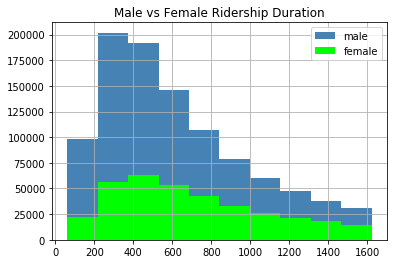

In [12]:
df2[df.gender == 1].tripduration.hist(color='SteelBlue', label='male')
df2[df.gender == 2].tripduration.hist(color='Lime', label='female')
pl.title('Male vs Female Ridership Duration')
pl.legend()

In [42]:
male_avg = df2[df2.gender == 1].tripduration.mean() 
female_avg = df2[df2.gender == 2].tripduration.mean()
male_var = df2[df2.gender == 1].tripduration.var()
female_var = df2[df2.gender == 2].tripduration.var()
male_len = male_var/df2[df2.gender == 1].shape[0]
female_len = female_var/df2[df2.gender == 2].shape[0]

In [46]:
print(male_avg, female_avg)
print(np.sqrt(male_var), np.sqrt(female_var))

626.988071012 700.382367615
370.067350308 380.05539476


In [24]:
#z = (male_avg - female_avg) / np.sqrt(() + (female_var/df2[df2.gender == 2].shape[0]))

In [45]:
#z

-99.073118709061831

In [27]:
import scipy.stats as stats

0.0

In [43]:
pooled = ((male_len-1)*male_var + (female_len - 1)*female_var) / (female_len + male_len - 2)

In [48]:
t = (male_avg - female_avg) / (pooled * np.sqrt((1/male_len) + (1 / female_len)))
print(t)

-0.00016810918164


the critical values of t are -1.96 and +1.96 and since the z score is 0 we fail to reject the null 